In [42]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

inward = pd.read_csv('D:/2probe/clean/micro+nano/inward_cut_back.csv')
reverse = pd.read_csv('D:/2probe/clean/micro+nano/reverse_cut_back.csv')

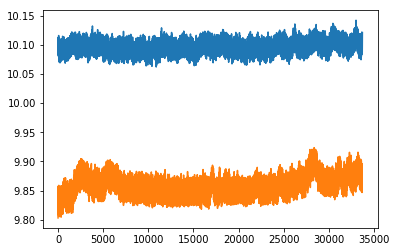

In [43]:
plt.plot(inward['time'],inward['R'])
plt.plot(reverse['time'],reverse['R'])

In [44]:
print(inward.head())
print(inward.tail())
print(reverse.head())
print(reverse.tail())

      time         R
0  0.00000  10.11106
1  0.42600  10.11011
2  0.85199  10.11038
3  1.27701  10.10972
4  1.70301  10.10878
              time         R
79166  33729.07121  10.11490
79167  33729.49722  10.11617
79168  33729.92422  10.11711
79169  33730.35123  10.11939
79170  33730.77634  10.12078
      time        R
0  0.00000  9.80318
1  0.42701  9.80609
2  0.85300  9.80855
3  1.27804  9.81136
4  1.70413  9.81337
              time        R
79085  33695.05142  9.85632
79086  33695.47753  9.85326
79087  33695.90354  9.85195
79088  33696.32854  9.84945
79089  33696.75453  9.84703


In [46]:
T=33.73
P1=1000
P2=999
accuracy=1.0  #lowest and highest point in every cycle is not a single point
# it is in fact average of several measuremnts during 1.0s, to avoid outlier

In [47]:
def low_high1(inward):
    low=[]
    high=[]
    low_ave=[]
    high_ave=[]
    
    low_start=T/2.0
    high_start=T
    for i in range(P1):
        low.append(inward.loc[(inward['time']>low_start-(accuracy/2.0))&(inward['time']<low_start+(accuracy/2.0)),'R'].mean())
        high.append(inward.loc[(inward['time']>high_start-(accuracy/2.0))&(inward['time']<high_start+(accuracy/2.0)),'R'].mean())
        low_start+=T
        high_start+=T
        if i%50==49:
            low_ave.append(np.average(low[i-49:i+1]))
            high_ave.append(np.average(high[i-49:i+1]))
        
    return low,high,low_ave,high_ave

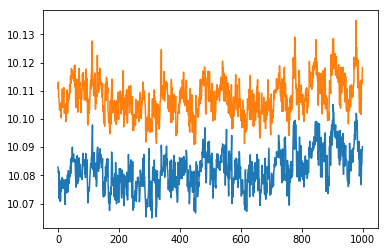

In [48]:
low,high,low_ave,high_ave=low_high1(inward)
#plot lowest and highest point of every cycle
plt.plot(low)
plt.plot(high)

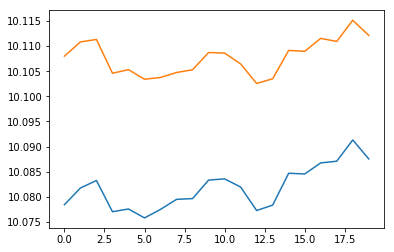

In [49]:
#plot average oflowest and highest point of every 50 cycles
plt.plot(low_ave)
plt.plot(high_ave)

In [50]:
def low_high2(reverse):
    low=[]
    high=[]
    low_ave=[]
    high_ave=[]
    
    low_start=T
    high_start=T/2.0
    for i in range(P2):
        low.append(reverse.loc[(reverse['time']>low_start-(accuracy/2.0))&(reverse['time']<low_start+(accuracy/2.0)),'R'].mean())
        high.append(reverse.loc[(reverse['time']>high_start-(accuracy/2.0))&(reverse['time']<high_start+(accuracy/2.0)),'R'].mean())
        low_start+=T
        high_start+=T
        if i%50==49:
            low_ave.append(np.average(low[i-49:i+1]))
            high_ave.append(np.average(high[i-49:i+1]))
    low_ave.append(np.average(low[950:999]))
    high_ave.append(np.average(high[950:999]))    
    return low,high,low_ave,high_ave

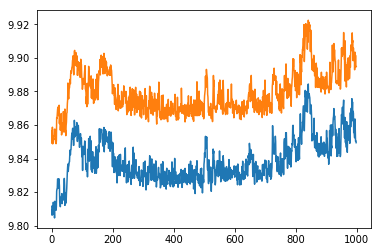

In [51]:
low,high,low_ave,high_ave=low_high2(reverse)

plt.plot(low)
plt.plot(high)

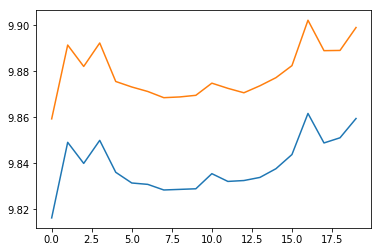

In [53]:
plt.plot(low_ave)
plt.plot(high_ave)